In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 90)

In [2]:
# Reading the data from file into a pandas dataframe:
INPUT_PATH = Path.cwd() / "data"
df = pd.read_pickle(INPUT_PATH / "housingCleanedEncoded.pkl")

Show the top 5 rows of the data.

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,2,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


# Plotting

Plotting can be an end in itself. See for example the following visualizations:
- [How people spend their time?](https://flowingdata.com/2016/12/06/how-people-like-you-spend-their-time/)
- [When do people to X for the first time?](https://flowingdata.com/2017/02/23/the-first-time/)
- [How do CNN, FOX and NBC differ in their reporting?](https://pudding.cool/2018/01/chyrons/)

However, what we are interested in is making **predictions** about the **sale price**. What exactly does that mean and how can data visualization help us with that?

## Let's use our plotting knowledge to explore sale price and how it is connected with other variables

## Scatter plots

As an example, we create a scatterplot of SalePrice:

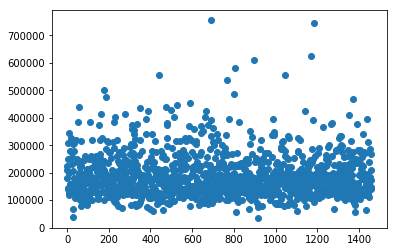

In [4]:
y = df["SalePrice"]
plt.plot(y,'o')
plt.show()

Create a new scatterplot, but change the color to red

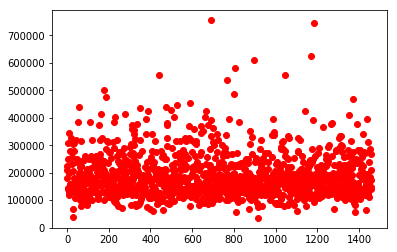

In [9]:
y = df["SalePrice"]
plt.plot(y,'ro')

Create a new scatterplot, but instead of dots ('o'), show crosses ('+')

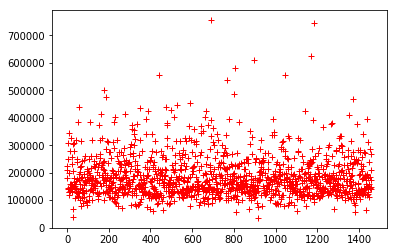

In [10]:
y = df["SalePrice"]
plt.plot(y,'r+')

Create a new scatterplot and add the title 'Salesprices' to the plot

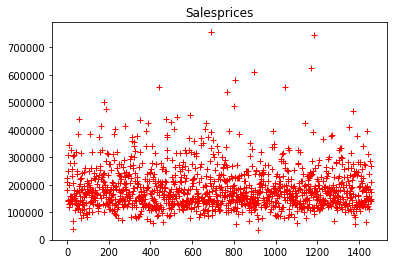

In [11]:
plt.title('Salesprices')
plt.plot(y,'r+')

Create a new scatterplot and add the label 'euro' to the vertical axis

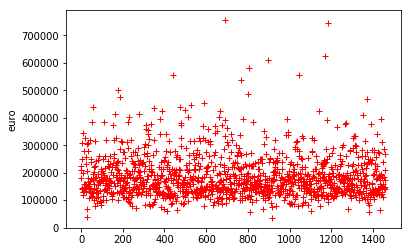

In [14]:
plt.ylabel('euro')
plt.plot(y,'r+')
plt.show()

The x-axis shows values from 0 to ~1500. Create a new scatterplot, but only show the data between 400 and 800

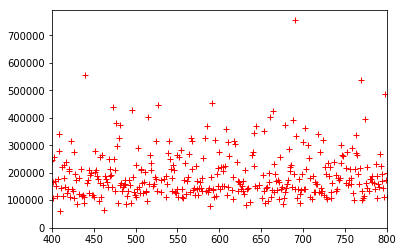

In [20]:

plt.xlim(400,800)
plt.plot(y,'r+')

So far, we created plots of one variable (SalePrice). You can also plot 2 (or more) variables into one figure. 

Make a scatterplot of 'GrLivArea' in blue and a scatterplot of 'TotalBsmtSF' in red and show it into the same figure/graph.

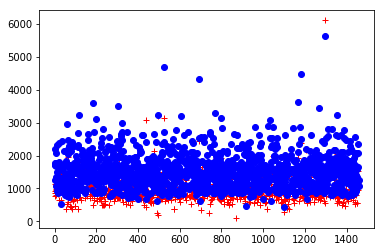

In [37]:
x=df['GrLivArea']
z=df['TotalBsmtSF']
plt.plot(z,'r+')
plt.plot(x,'bo')

Create the sampe scatterplots, but add a legend which describes what blue and red is.

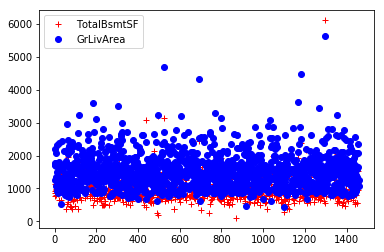

In [39]:
plt.plot(z,'r+')
plt.plot(x,'bo')
plt.legend()

## Histograms

A Histogram is a special (and important!) kind of visualization. It is used a lot in statistics and data science. A histogram shows frequency data, which means it shows how often a value occurs.

So if you make a histogram of SalePrice, python does 3 things:
1. it makes a number of 'virtual' bins (bin1 = [0, 1000), bin2 = [1000, 2000), etc ...)
2. it counts how often a SalePrice was in that bin
3. it plots a barchart of those counts

Create a histogram of SalePrice

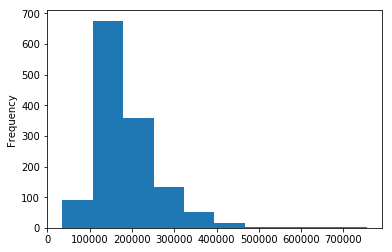

In [43]:
df["SalePrice"].plot.hist(bins=10)

What do you think is the average housing price? Double check it by calculating the mean of SalePrice:

In [45]:
df.loc[:,'SalePrice'].mean()

186761.78251121077

So far we gave python x and y coordinates and matplotlib plotted a dot/cross/bar/... on this location. For example, to create a point on location (1,3), we do:

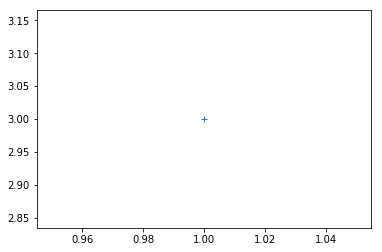

In [47]:
x = 1
y = 3
plt.plot(x,y,'+')
plt.show()

Create a scatter plot of GrLivArea vs. ln_SalePrice

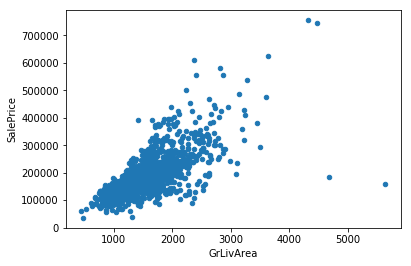

In [51]:
df.plot.scatter("GrLivArea", "SalePrice") # Above grade (ground) living area square feet

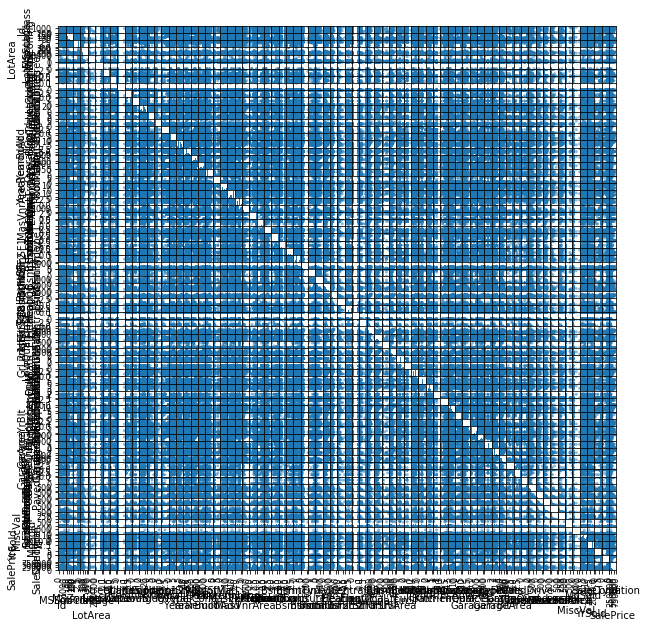

In [55]:
pd.plotting.scatter_matrix(df,
                          figsize=[10,10]);